# Packages

In [128]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from matplotlib import style
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
style.use('seaborn-dark')
#from google.colab import drive #allows to mount drive

# Import Data

In [80]:
#drive.mount('/content/drive')

Importing data

In [81]:
data = pd.read_pickle(r'dirty_data')

Examine dataframe:

In [82]:
data

,Date,Kommune,Area,Region,Location,longitude,latitude,altitude,Cases,Tested,Code,Alternative Code,Antal_døde,Temperature,CO2Emission,Daylength,Gennemsnit for alle personer (kr.)
0,2019-01-01,Fredensborg kommune,NaN,NaN,NaN,12.401836,55.979291,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25474.371041,NaN
1,2019-01-01,Skanderborg,NaN,NaN,NaN,9.862985,56.084998,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25390.986357,NaN
2,2019-01-01,Halsnæs Kommune,NaN,NaN,NaN,12.015366,55.976703,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25476.501162,NaN
3,2019-01-01,Christiansø hører under Forsvarsministeriet,NaN,NaN,NaN,15.189678,55.320461,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25982.760867,NaN
4,2019-01-01,Aalborg,NaN,NaN,NaN,9.919488,57.046108,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,24596.569354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61425,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309448.0
61426,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308082.0
61427,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307772.0
61428,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302365.0


In [83]:
data.dtypes

Date                                  datetime64[ns]
Kommune                                       object
Area                                          object
Region                                        object
Location                                      object
longitude                                    float64
latitude                                     float64
altitude                                     float64
Cases                                        float64
Tested                                       float64
Code                                         float64
Alternative Code                              object
Antal_døde                                   float64
Temperature                                  float64
CO2Emission                                  float64
Daylength                                    float64
Gennemsnit for alle personer (kr.)           float64
dtype: object

In [84]:
data = data.sort_values(by='Date')

In [85]:
data = data.reset_index(drop=True)

# Identify missing data

For a simple overview of missing data we construct a heatmap:

<AxesSubplot:>

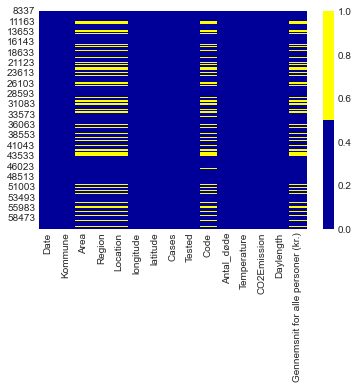

In [101]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sn.heatmap(data.isnull(), cmap=sn.color_palette(colours))

A list view of missing values:

In [87]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Kommune - 0%
Area - 33%
Region - 33%
Location - 33%
longitude - 0%
latitude - 0%
altitude - 0%
Cases - 16%
Tested - 15%
Code - 34%
Alternative Code - 52%
Antal_døde - 18%
Temperature - 16%
CO2Emission - 28%
Daylength - 0%
Gennemsnit for alle personer (kr.) - 33%


## Adjustment of missing values

## Date

We can see that there are indeed some Not-a-Time values in the dataframe print from previous

In [88]:
data[data['Date'].isnull()]

,Date,Kommune,Area,Region,Location,longitude,latitude,altitude,Cases,Tested,Code,Alternative Code,Antal_døde,Temperature,CO2Emission,Daylength,Gennemsnit for alle personer (kr.)
61397,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353203.0
61398,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342385.0
61399,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437574.0
61400,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339955.0
61401,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388125.0
61402,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295586.0
61403,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318459.0
61404,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290740.0
61405,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330436.0
61406,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414861.0


In [89]:
data = data.drop(data[data['Date'].isnull()].index)

## Temperature

<AxesSubplot:>

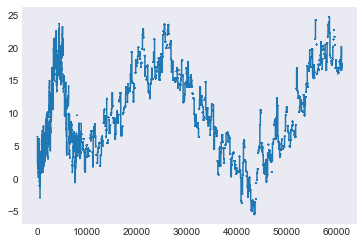

In [90]:
data.Temperature.plot()

<AxesSubplot:>

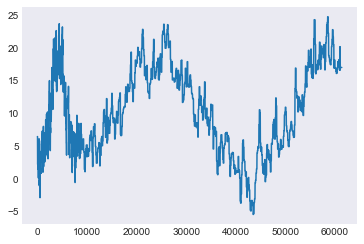

In [91]:
data.Temperature.interpolate().plot()

In [92]:
data['Temperature'] = data.Temperature.interpolate()

## CO2 Emission

<AxesSubplot:>

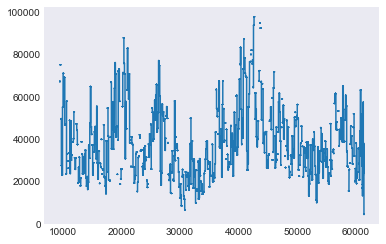

In [93]:
data.CO2Emission.plot()

<AxesSubplot:>

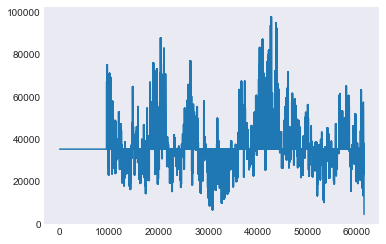

In [94]:
med = data.CO2Emission.median()
data.CO2Emission.fillna(med).plot()

In [95]:
data['CO2Emission'] = data.CO2Emission.fillna(med)

# Irregular data (Outliers)

In [104]:
# calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

C:\Users\danho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [117]:
lower['Temperature']

-9.455165413176807

In [118]:
outliers = [x for x in data.Temperature if x < lower['Temperature'] or x > upper['Temperature']]

In [119]:
outliers

[]

# Unnecessary data

Unnecessary data can be hard to identify early on in the project. We are looking for uninformative, irrelevant and duplicate type data

In [96]:
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

altitude: 100.00000%
0.0    61397
Name: altitude, dtype: int64



We see that the altitude is the same throughout the dataset (0) as it probably wasnt measured. We remove this value:

In [97]:
del data['altitude']

Also, because we are interested in examining the COVID19 impact the data before the first case/test in DK is uninformative for out further analysis:

In [98]:
data = data.drop(data[(data.Tested.isnull())&(data.Cases.isnull())].index)

We can impute the remaining cases, tested and deaths as zero if it is a NaN

In [99]:
data['Tested'] = data.Tested.fillna(0)
data['Cases'] = data.Cases.fillna(0)
data['Antal_døde'] = data.Antal_døde.fillna(0)

The alternative code for the municipalities provides no further value in analysis:

In [100]:
del data['Alternative Code']

# Inconsistent data

In [135]:
data[data.Area.isnull()].Kommune.unique()

array(['Hillerød Kommune', 'Århus Kommune', 'Rødovre Kommune',
       'Brønderslev Kommune', 'Brøndby Kommune', 'Allerød Kommune',
       'Høje Taastrup Kommune', 'Halsnæs Kommune', 'Holbæk Kommune',
       'Bornholm kommune', 'Tårnby Kommune', 'Køge Kommune', 'Aalborg',
       'Hjørring Kommune', 'Christiansø hører under Forsvarsministeriet',
       'Solrød Kommune', 'Dragør Kommune', 'Ishøj Kommune',
       'Tønder Kommune', 'Skanderborg', 'Fredensborg kommune'],
      dtype=object)

We can then find the area and region for each of the specific missing. We will not do this in the interest of time. 

# Data Correlation Plots

As we have now succesfully cleaned and ajusted data we can start doing some correlation plots:

Scatter Matrix:

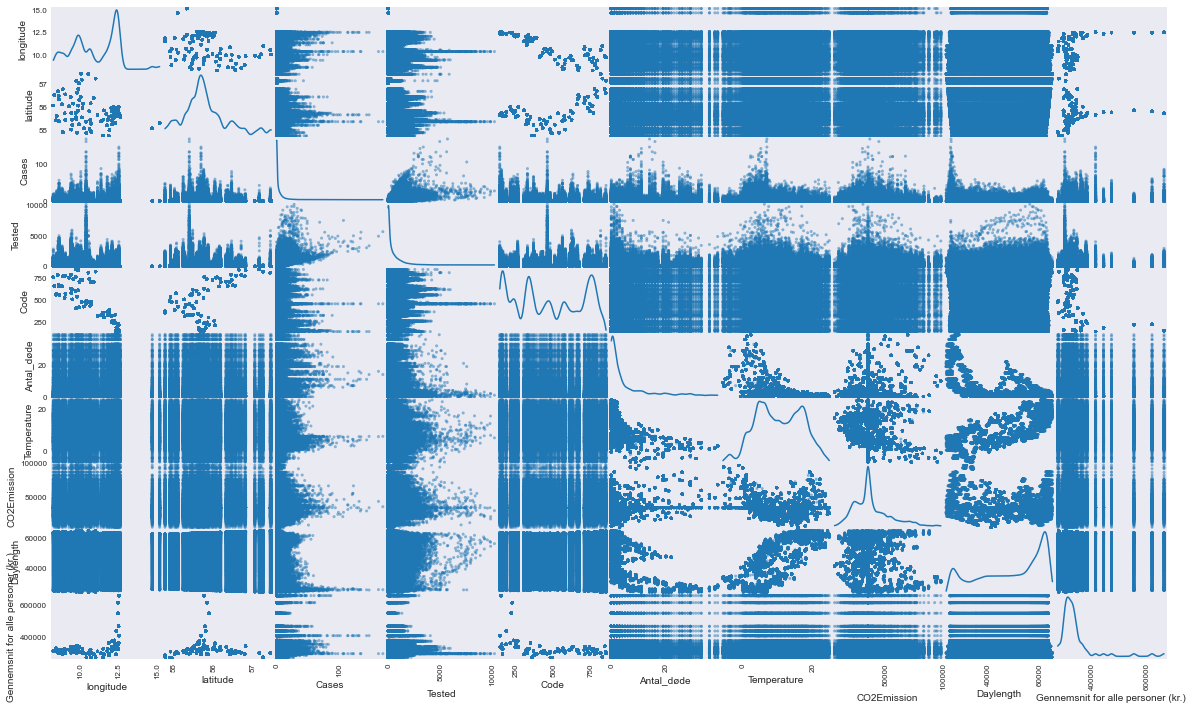

In [126]:
scatter_matrix(data, figsize=(20, 12), diagonal="kde");

Heatmap:

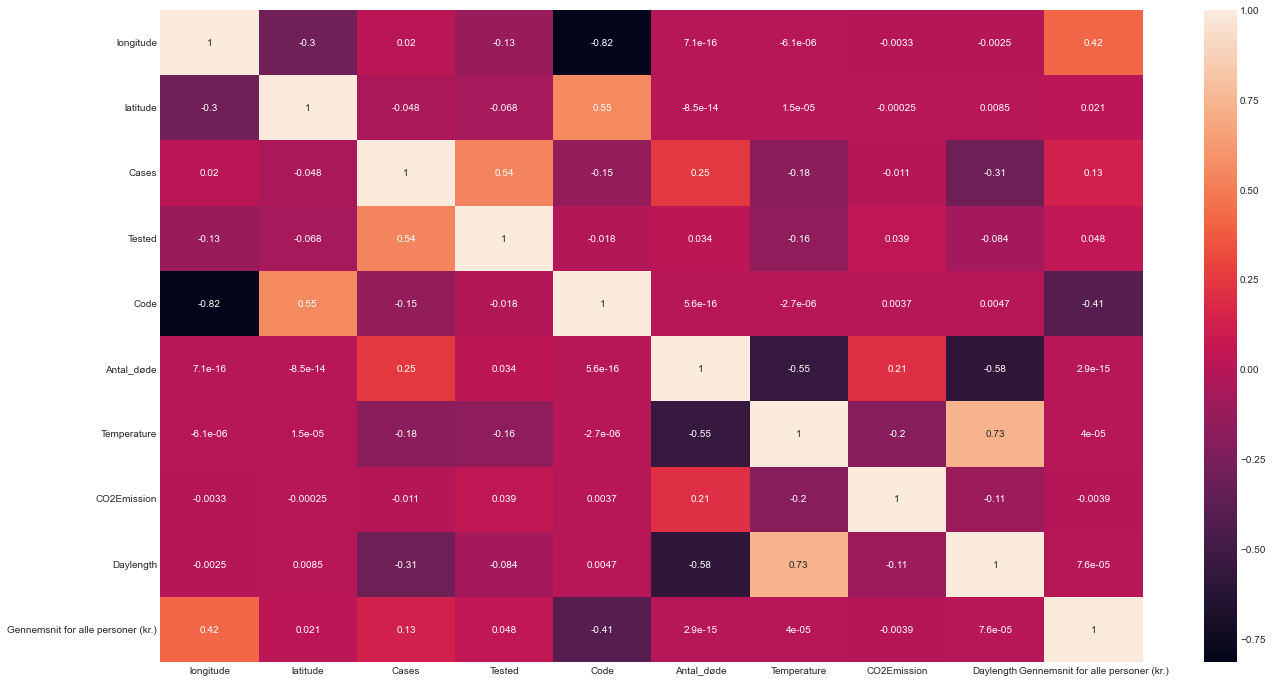

In [129]:
corrMatrix = data.corr()

fig, ax = plt.subplots(figsize=(22,12))  
sn.heatmap(corrMatrix, annot=True)
plt.show()

C:\Users\danho\AppData\Local\Temp\1/ipykernel_7700/3346438594.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
C:\Users\danho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\danho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0, flags=flags)


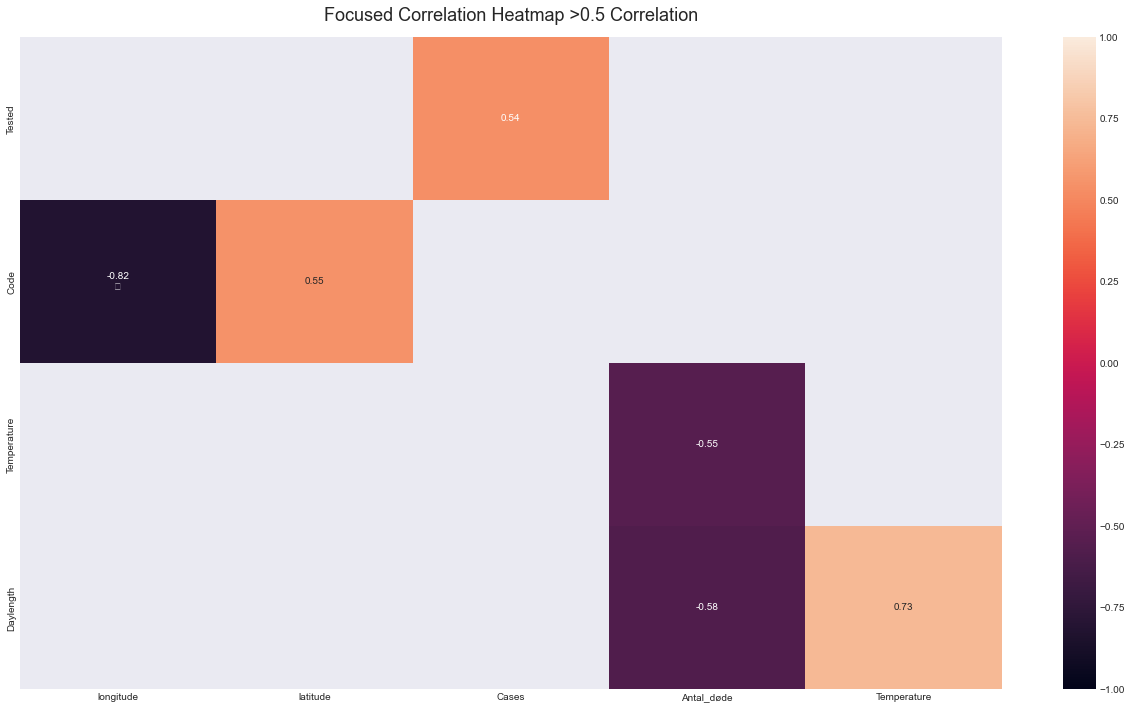

In [130]:
corr = corrMatrix

mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.5  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.2f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

fig, ax = plt.subplots(figsize=(22,12)) 
heatmap = sn.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='')
heatmap.set_title('Focused Correlation Heatmap >0.5 Correlation', fontdict={'fontsize': 18}, pad=16)
plt.show()

# FAIR

Renaming columns to be more intuitive

In [131]:
data.columns

Index(['Date', 'Kommune', 'Area', 'Region', 'Location', 'longitude',
       'latitude', 'Cases', 'Tested', 'Code', 'Antal_døde', 'Temperature',
       'CO2Emission', 'Daylength', 'Gennemsnit for alle personer (kr.)'],
      dtype='object')

In [15]:
column_names = ['Date', 'Municipality', 'Area', 'Region', 'Location', 'Longitude',
               'Latitude', 'Cases', 'Tested', 'Code', 'Deaths', 'Temperature',
               'CO2Emission', 'Daylength', 'AverageIncome']

In [138]:
i = 0
for col in data.columns:
    data = data.rename(columns={col : column_names[i]})
    i = i + 1 

Save to .csv format which will be useful for later use

In [ ]:
data.to_csv(r'clean_data',index=False)